In [1]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [1]:
# Import libraries etc
%matplotlib inline
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import time
 
pd.options.display.mpl_style = 'default'
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)
rcParams['figure.dpi'] = 150
rcParams['font.size'] = 16
rcParams['font.family'] = 'sans-serif'
rcParams['axes.facecolor'] = '#ffffff'
rcParams['lines.linewidth'] = 2.0

/home/ubuntu/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#matplotlib.pyplot.style.use
# Import libraries etc
%matplotlib inline
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import time
 
plt.pyplot.style.use = 'default'
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)
rcParams['figure.dpi'] = 150
rcParams['font.size'] = 16
rcParams['font.family'] = 'sans-serif'
rcParams['axes.facecolor'] = '#ffffff'
rcParams['lines.linewidth'] = 2.0

AttributeError: 'module' object has no attribute 'pyplot'

# begin with exploration

In [2]:
ls

datasets/  Practice data set – Loan Prediction Problem.ipynb


In [5]:
!head -20 datasets/train.csv

In [3]:
df = pd.read_csv("datasets/train.csv") #Reading the dataset in a dataframe using Pandas

# Quick Data Exploration

Once you have read the dataset, you can have a look at few top rows by using the function head()

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Next, you can look at summary of numerical fields by using describe() function

In [5]:
df.describe()

/home/ubuntu/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


* describe() function would provide count, mean, standard deviation (std), min, quartiles and max in its output
* Here are a few inferences, you can draw by looking at the output of describe() function:

-  LoanAmount has (614 – 592) 22 missing values.
-  Loan_Amount_Term has (614 – 600) 14 missing values.
- Credit_History has (614 – 564) 50 missing values.
- We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)

* The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome
* Please note that we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.

* For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not. The frequency table can be printed by following command:

In [6]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Lets start by plotting the histogram of ApplicantIncome using the following commands:

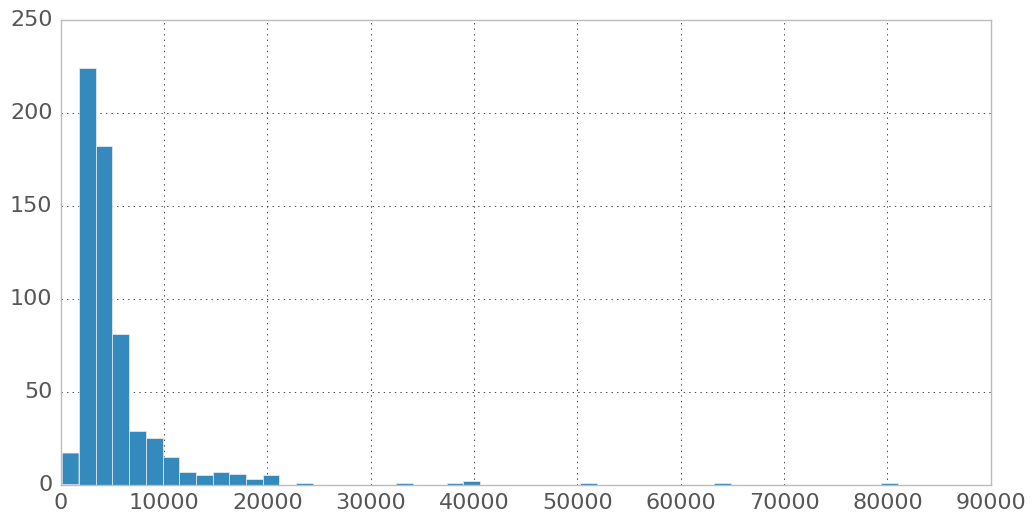

In [7]:
df['ApplicantIncome'].hist(bins=50)

* Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.

* Next, we look at box plots to understand the distributions. 
* Box plot for fare can be plotted by:

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7fb011f2ab90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb011f3cad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb011ec7d50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb011ec7790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb011f2ad90>,
  <matplotlib.lines.Line2D at 0x7fb011f3c490>]}

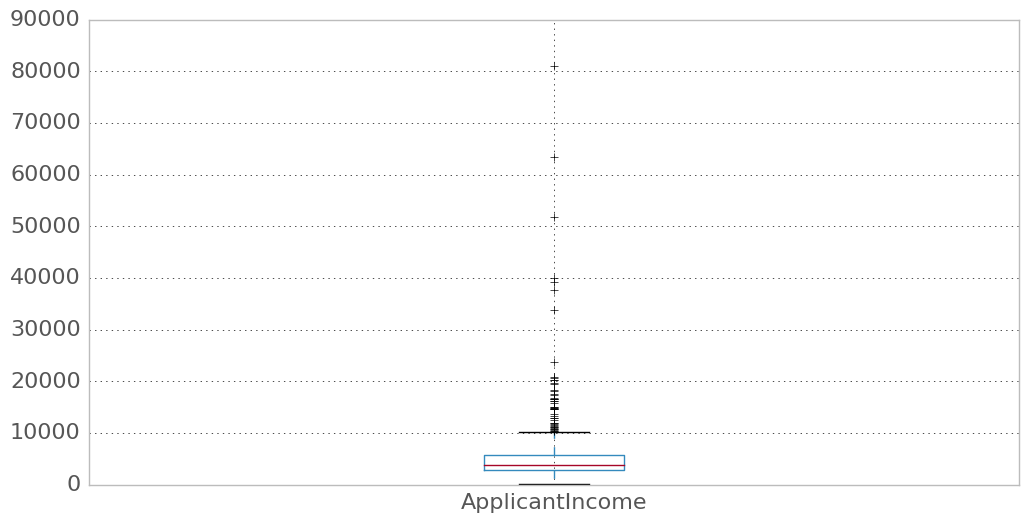

In [8]:
df.boxplot(column='ApplicantIncome')

* This confirms the presence of a lot of outliers/extreme values. 
* This can be attributed to the income disparity in the society. 
* Part of this can be driven by the fact that we are looking at people with different education levels. 
* Let us segregate them by Education:



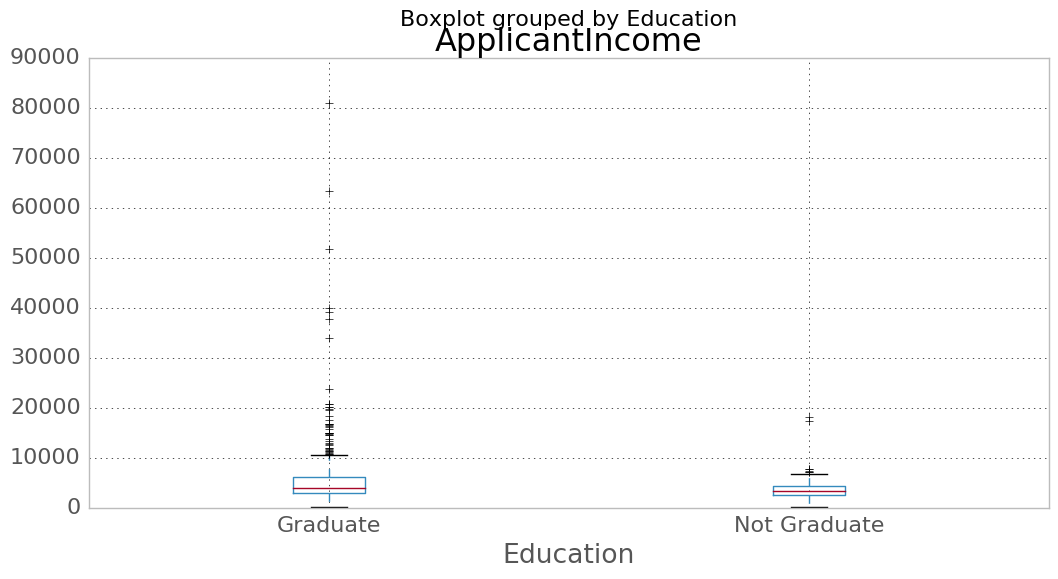

In [9]:
df.boxplot(column='ApplicantIncome', by = 'Education')

* We can see that there is no substantial different between the mean income of graduate and non-graduates. 
* But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

* Now, Let’s look at the histogram and boxplot of LoanAmount using the following command:

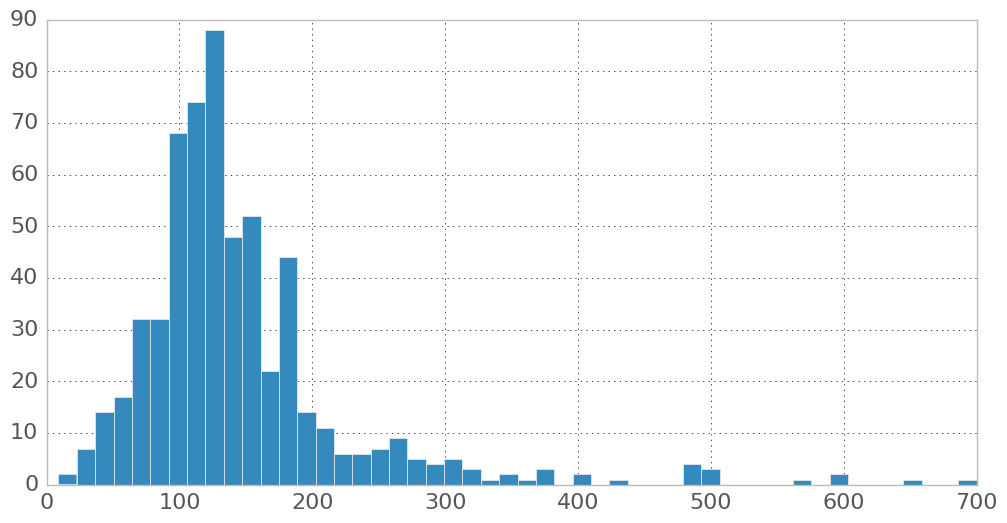

In [10]:
df['LoanAmount'].hist(bins=50)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7fb01169ea10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb01162c8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb011636bd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb011636590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb01169eb90>,
  <matplotlib.lines.Line2D at 0x7fb01162c290>]}

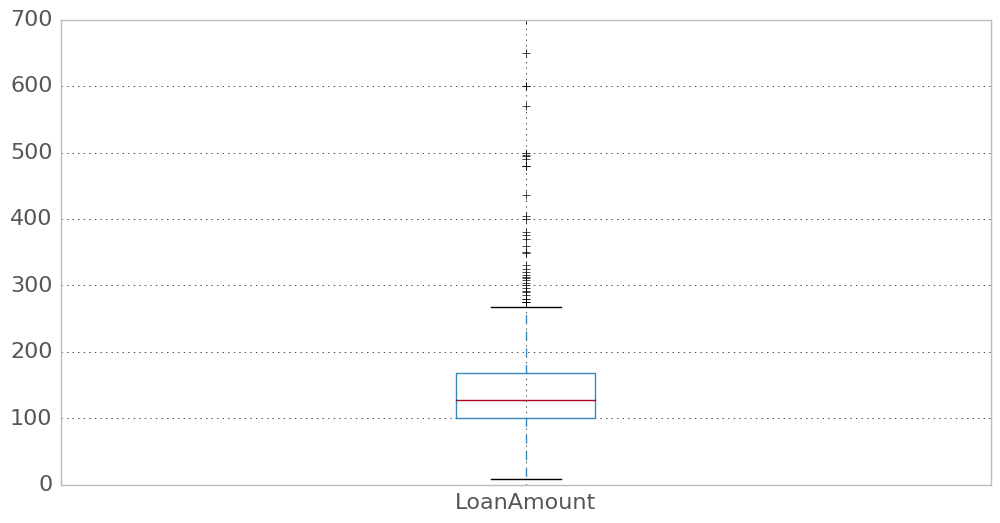

In [11]:
df.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding. We will take this up in coming sections.

In [12]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print 'Frequency Table for Credit History:' 
print temp1

print '\nProbility of getting loan for each Credit History class:' 
print temp2

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


Now we can observe that we get a similar pivot_table like the MS Excel one. This can be plotted as a bar chart using the “matplotlib” library with following code:



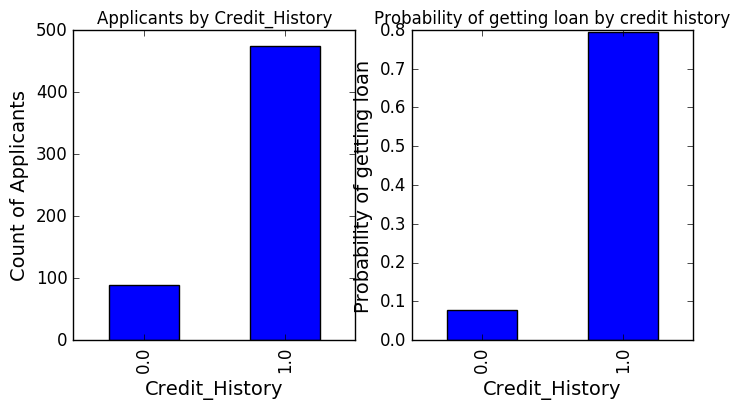

In [25]:
#import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")